In [16]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
import math

In [17]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [18]:
# Varying parameter (others fixed to default)
var_name = 'omega_b'
var_min = 0.01
var_max = var_min + 0.025
var_num = 3
var_legend = r'$omega_\mathrm{b}$'
var_figname = 'omegab'

In [19]:
# Fixed settings
common_settings = {
    'h': 0.7,
    'omega_cdm': 0.12038,
    'A_s': 2.215e-9,
    'n_s': 0.96,
    'tau_reio': 0.0925,
    'YHe':0.246,
    'output': 'tCl',
}

In [20]:
# arrays for output
kvec = np.logspace(-4,np.log10(3),1000)
legarray = []
twopi = 2.*math.pi

*Compute with omega_b=1.000000e-02
*Compute with omega_b=2.250000e-02
*Compute with omega_b=3.500000e-02


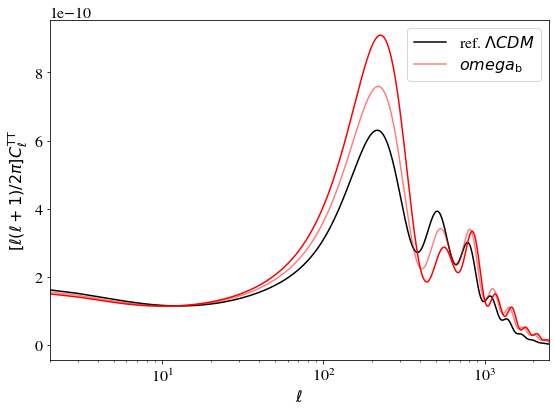

In [21]:
# Create figure
fig_TT, ax_TT = plt.subplots()

# loop over varying parameter values
for i in range(var_num):
    #
    # deal with varying parameters:
    #
    var = var_min + (var_max-var_min)*i/(var_num-1.)
    #
    print('*Compute with %s=%e'%(var_name,var))
    #
    # deal with colors and legends
    #
    if i == 0:
        var_color = 'k'
        var_alpha = 1.
        legarray.append(r'ref. $\Lambda CDM$')
    else:
        var_color = 'r'
        var_alpha = 1.*i/(var_num-1.)
    if i == var_num-1:
        legarray.append(var_legend)  
    #    
    # call CLASS
    #
    M = Class()
    M.set(common_settings)
    M.set({var_name:var})
    M.compute()
    #
    # get Cls
    #
    clM = M.raw_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    #
    # plot C_l^TT
    #
    ax_TT.semilogx(ll,clTT*ll*(ll+1)/twopi,color=var_color,alpha=var_alpha,linestyle='-')
    #
    # reset CLASS
    #
    M.struct_cleanup()
    
#
# output of C_l^TT figure
#      
ax_TT.set_xlim([2,2500])
ax_TT.set_xlabel(r'$\ell$')
ax_TT.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
ax_TT.legend(legarray)
fig_TT.tight_layout()
fig_TT.savefig('spectra_%s_cltt.pdf' % var_figname)